## Think Stats2

### Chapter4

#### PMFのプロット(復習)

In [1]:
import numpy as np

import nsfg
import first
import thinkstats2
import thinkplot

In [2]:
live, firsts, others = first.MakeFrames()

In [3]:
first_wgt = firsts.totalwgt_lb
first_wgt_dropna = first_wgt.dropna()
print('Firsts:', len(first_wgt), len(first_wgt_dropna))
 
others_wgt =others.totalwgt_lb
others_wgt_dropna = first_wgt.dropna()
print("Others:",len(others_wgt),len(others_wgt_dropna))

Firsts: 4413 4363
Others: 4735 4363


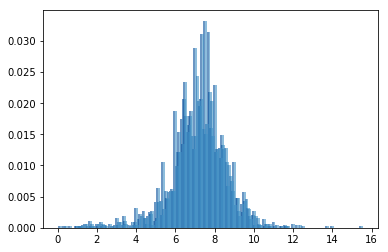

In [4]:
width = 0.1

first_pmf = thinkstats2.Pmf(first_wgt_dropna)
others_pmf = thinkstats2.Pmf(others_wgt_dropna)

thinkplot.PrePlot(2)
thinkplot.Hist(first_pmf,align="right",width=width)
thinkplot.Hist(others_pmf,align="left",width=width)
thinkplot.Show()
thinkplot.Config(xlabel="weight",ylabel="probability")

#### パーセンタイル

In [5]:
def PercentileRank(scores,your_score):
    count=0
    for i in scores:
        if i <= your_score:
            count += 1
            
    percentile_rank = 100.0*count/len(scores)
    return percentile_rank

#scoreの長さだけ他の人の点数、そのうち自分のほうが高い場合をカウント

In [6]:
def Percentile(scores,percentile_rank):
    scores.sort()
    for i in scores:
        if PercentileRank(scores,i) >= percentile_rank:
            return i
        
#パーセンタイル値を返す

In [7]:
a =[55,67,77,88,99]
b = 79
PercentileRank(a,b)

60.0

In [8]:
Percentile(a,60.0)

77

In [9]:
len(a)

5

In [10]:
def Percentile2(scores,percentile_rank):
    scores.sort()
    index = percentile_rank//100*(len(scores))-1
    return scores[index]

In [11]:
Percentile2(a,60)

99

In [12]:
5//3
#切り捨て演算がよい

1

In [13]:
199//43

4

#### CDF

In [14]:
def EvalCdf(t,x):
    count = 0.0
    for value in t:
        if value <= x:
            count += 1
            
    prob = count/len(t)
    return prob

In [15]:
val = [1,2,2,3,5]

In [16]:
vals = val.sort()
print(vals)

# ?

None


In [17]:
for i in range(0,6):
    print("CDF(i):",EvalCdf(val,i))

CDF(i): 0.0
CDF(i): 0.2
CDF(i): 0.6
CDF(i): 0.8
CDF(i): 0.8
CDF(i): 1.0


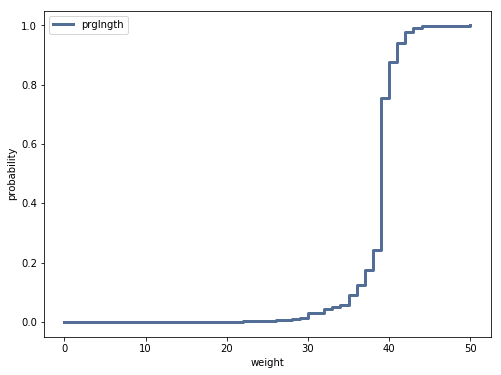

In [18]:
cdf = thinkstats2.Cdf(live.prglngth, label='prglngth')
thinkplot.Cdf(cdf)
thinkplot.Show()
thinkplot.Config(xlabel='Pregnancy length (weeks)', ylabel='CDF', loc='upper left')

In [19]:
cdf.Prob(38)

0.2414735461303017

In [20]:
cdf.Prob(49)

0.99978137297770009

In [21]:
cdf.Value(0.60)

39

#### CDFの表現、比較

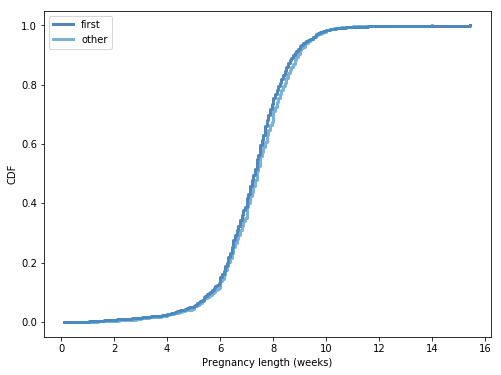

In [22]:
first_cdf = thinkstats2.Cdf(firsts.totalwgt_lb, label='first')
other_cdf = thinkstats2.Cdf(others.totalwgt_lb, label='other')

thinkplot.PrePlot(2)
thinkplot.Cdfs([first_cdf, other_cdf])
thinkplot.Show()
thinkplot.Config(xlabel='Weight (pounds)', ylabel='CDF')

#### パーセンタイル派生統計量

In [23]:
first_cdf.PercentileRank(8)

75.681870272748114

In [24]:
other_cdf.PercentileRank(8)

71.122994652406419

In [25]:
print("cdfはほぼ一致",first_cdf.Percentile(0.6),first_cdf.Percentile(0.6))

cdfはほぼ一致 1.75 1.75


In [27]:
median = first_cdf.Percentile(50)
median

7.3125

In [29]:
ir75 = first_cdf.Percentile(75)
ir25 = first_cdf.Percentile(25)
IQR = ir75-ir25
IQR

1.5625

In [30]:
ir75

8.0

In [31]:
ir25

6.4375

#### 乱数

In [38]:
weights = live.totalwgt_lb
cdf = thinkstats2.Cdf(weights,label ="totalwgt_lb")

In [48]:
sample = np.random.choice(weights,300, replace = False)
ranks = [cdf.PercentileRank(x) for x in sample]

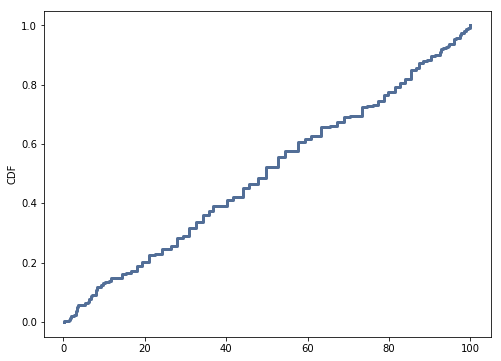

In [49]:
rank_cdf = thinkstats2.Cdf(ranks)
thinkplot.Cdf(rank_cdf)
thinkplot.Show(xlavel ="percentile rank",ylabel = "CDF")

#### パーセンタイル順位の比較